In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project_List/models/smart_home_device_usage_data.csv')

In [ ]:
df.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [ ]:
df['SmartHomeEfficiency'].value_counts()

SmartHomeEfficiency
0    3368
1    2035
Name: count, dtype: int64

###EDA

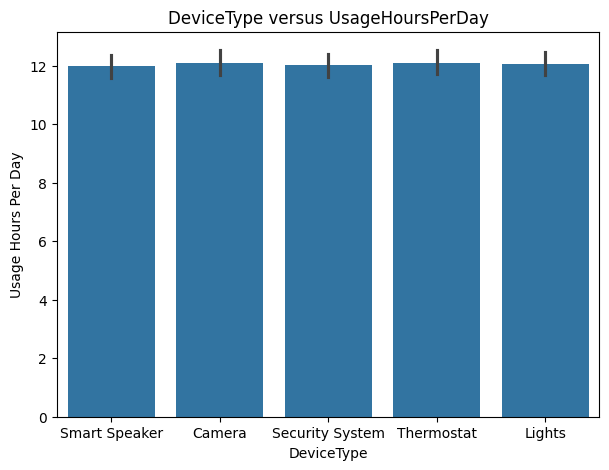

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='DeviceType', y='UsageHoursPerDay', data=df)
plt.title('DeviceType versus UsageHoursPerDay')
plt.xlabel('DeviceType')
plt.ylabel('Usage Hours Per Day')
plt.show()

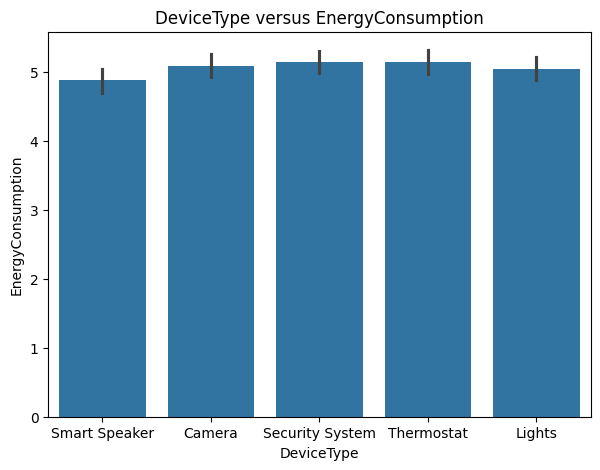

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='DeviceType', y='EnergyConsumption', data=df)
plt.title('DeviceType versus EnergyConsumption')
plt.xlabel('DeviceType')
plt.ylabel('EnergyConsumption')
plt.show()

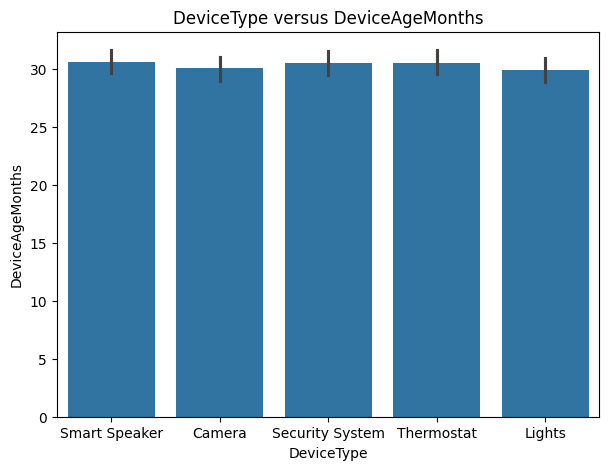

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='DeviceType', y='DeviceAgeMonths', data=df)
plt.title('DeviceType versus DeviceAgeMonths')
plt.xlabel('DeviceType')
plt.ylabel('DeviceAgeMonths')
plt.show()

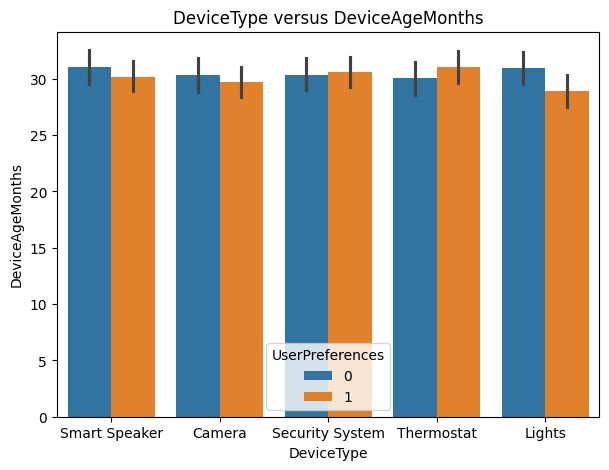

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='DeviceType', y='DeviceAgeMonths',hue='UserPreferences',data=df)
plt.title('DeviceType versus DeviceAgeMonths')
plt.xlabel('DeviceType')
plt.ylabel('DeviceAgeMonths')
plt.show()

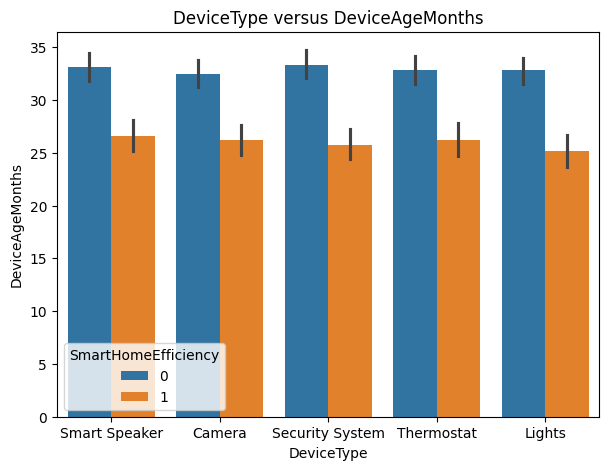

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x='DeviceType', y='DeviceAgeMonths',hue='SmartHomeEfficiency',data=df)
plt.title('DeviceType versus DeviceAgeMonths')
plt.xlabel('DeviceType')
plt.ylabel('DeviceAgeMonths')
plt.show()

In [ ]:
df.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


###Feature Engineering

In [ ]:
dummiess=pd.get_dummies(df.DeviceType,dtype=int)
dummiess

,Camera,Lights,Security System,Smart Speaker,Thermostat
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,1,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
5398,0,0,0,0,1
5399,0,1,0,0,0
5400,0,0,0,1,0
5401,0,0,1,0,0


In [ ]:
merged = pd.concat([df,dummiess],axis='columns')
merged

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency,Camera,Lights,Security System,Smart Speaker,Thermostat
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1,0,0,0,1,0
1,2,Camera,19.973343,8.610689,1,0,29,1,1,0,0,0,0
2,3,Security System,18.911535,2.651777,1,0,20,1,0,0,1,0,0
3,4,Camera,7.011127,2.341653,0,3,15,0,1,0,0,0,0
4,5,Camera,22.610684,4.859069,1,3,36,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398,5399,Thermostat,4.556314,5.871764,1,0,28,0,0,0,0,0,1
5399,5400,Lights,0.561856,1.555992,1,4,24,0,0,1,0,0,0
5400,5401,Smart Speaker,11.096236,7.677779,0,0,42,0,0,0,0,1,0
5401,5402,Security System,8.782169,7.467929,0,2,28,1,0,0,1,0,0


In [ ]:
merged.drop(columns=['DeviceType'],axis=1,inplace=True)

In [ ]:
merged.head()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency,Camera,Lights,Security System,Smart Speaker,Thermostat
0,1,15.307188,1.961607,1,4,36,1,0,0,0,1,0
1,2,19.973343,8.610689,1,0,29,1,1,0,0,0,0
2,3,18.911535,2.651777,1,0,20,1,0,0,1,0,0
3,4,7.011127,2.341653,0,3,15,0,1,0,0,0,0
4,5,22.610684,4.859069,1,3,36,1,1,0,0,0,0


###Model Creation

In [ ]:
X=merged.drop('SmartHomeEfficiency',axis=1)
y=merged['SmartHomeEfficiency']

In [ ]:
X.head()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,Camera,Lights,Security System,Smart Speaker,Thermostat
0,1,15.307188,1.961607,1,4,36,0,0,0,1,0
1,2,19.973343,8.610689,1,0,29,1,0,0,0,0
2,3,18.911535,2.651777,1,0,20,0,0,1,0,0
3,4,7.011127,2.341653,0,3,15,1,0,0,0,0
4,5,22.610684,4.859069,1,3,36,1,0,0,0,0


In [ ]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: SmartHomeEfficiency, dtype: int64

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and fit the logistic regression model
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict probabilities
y_pred_prob = logistic.predict_proba(X_test)[:, 1]# for class 1 spam so 0 means not spam

In [ ]:
# Varying thresholds to observe the trade-off
thresholds = [0.2, 0.4, 0.6, 0.8]

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print(f"Threshold: {threshold}")
    print(f"True Positives: {tp}")
    print(f"False Positives: {fp}")
    print(f"True Negatives: {tn}")
    print(f"False Negatives: {fn}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)
     # Calculate precision, recall, F1-score, and AUC ROC score
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    auc_roc_score = roc_auc_score(y_test, y_pred_prob)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}")
    print(f"AUC ROC Score: {auc_roc_score:.4f}")

    print("-" * 30)

Threshold: 0.2
True Positives: 387
False Positives: 201
True Negatives: 477
False Negatives: 16
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       678
           1       0.66      0.96      0.78       403

    accuracy                           0.80      1081
   macro avg       0.81      0.83      0.80      1081
weighted avg       0.85      0.80      0.80      1081

------------------------------
Precision: 0.6582
Recall: 0.9603
F1-score: 0.7810
AUC ROC Score: 0.9301
------------------------------
Threshold: 0.4
True Positives: 361
False Positives: 101
True Negatives: 577
False Negatives: 42
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       678
           1       0.78      0.90      0.83       403

    accuracy                           0.87      1081
   macro avg       0.86      0.87      0.86      1081
weighted avg       0.88      